In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [159]:
customer = pd.read_csv('olist_customers_dataset.csv')
geolocation = pd.read_csv('olist_geolocation_dataset.csv')
order_item = pd.read_csv('olist_order_items_dataset.csv')
order_payment = pd.read_csv('olist_order_payments_dataset.csv')
order_review = pd.read_csv('olist_order_reviews_dataset.csv')
order = pd.read_csv('olist_orders_dataset.csv')
product = pd.read_csv('olist_products_dataset.csv')
seller = pd.read_csv ('olist_sellers_dataset.csv')
product_category = pd.read_csv('product_category_name_translation.csv')

## Total Revenue and Market Trend

### Data Pre Processing

##### order_item dataset

In [160]:
print(order_item.head())
print(order_item.info())

                           order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.7

In [161]:
# change type data object to datetime
order_item['shipping_limit_date'] = pd.to_datetime(order_item['shipping_limit_date'])

In [162]:
# checking missing value
order_item.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [163]:
# create total_value column
order_item['total_value'] = order_item['price'] + order_item['freight_value']

#### order dataset

In [164]:
print(order.head())
print(order.info())

                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08

In [165]:
# change some type data object to datetime
order['order_purchase_timestamp'] = pd.to_datetime(order['order_purchase_timestamp'])
order['order_approved_at'] = pd.to_datetime(order['order_approved_at'])
order['order_delivered_carrier_date'] = pd.to_datetime(order['order_delivered_carrier_date'])
order['order_delivered_customer_date'] = pd.to_datetime(order['order_delivered_customer_date'])
order['order_estimated_delivery_date'] = pd.to_datetime(order['order_estimated_delivery_date'])

In [166]:
# checking missing value
order.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [167]:
# handling with missing value

# step 1: find the average between purchase_time (no any missing value) with delivered_carrier
order_1 =order[order['order_delivered_carrier_date'].notnull()]
miss_carrier =(order_1['order_purchase_timestamp']-order_1['order_delivered_carrier_date']).mean()
miss_carrier

# step 2: find the missing value column (order_delivered_carrire_date) and subtract the average we have count before 
added_date = order[order['order_delivered_carrier_date'].isnull()]['order_purchase_timestamp'] - miss_carrier
added_date

# step 3: add the value we have got to the missing value
order['order_delivered_carrier_date']=order['order_delivered_carrier_date'].fillna(added_date)
order.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date        0
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [157]:
# do the same way to the other missing value
order_2 =order[order['order_approved_at'].notnull()]
miss_carrier =(order_2['order_purchase_timestamp']-order_2['order_approved_at']).mean()
miss_carrier
added_date = order[order['order_approved_at'].isnull()]['order_purchase_timestamp'] - miss_carrier
added_date
order['order_approved_at']=order['order_approved_at'].fillna(added_date)
order.isnull().sum()

# same
order_3 =order[order['order_delivered_customer_date'].notnull()]
miss_carrier =(order_3['order_purchase_timestamp']-order_3['order_delivered_customer_date']).mean()
miss_carrier
added_date = order[order['order_delivered_customer_date'].isnull()]['order_purchase_timestamp'] - miss_carrier
added_date
order['order_delivered_customer_date']=order['order_delivered_customer_date'].fillna(added_date)
order.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

#### Merge order_item dataset and order dataset

In [168]:
print(order_item.shape)
print(order.shape)

(112650, 8)
(99441, 8)


In [169]:
df = pd.merge(order_item, order, on = 'order_id', how = 'inner')
df.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
12124,1b7efcda93ef629e74df8b1fcd2b1f92,2,b5e13c9a353102f79c6206ff5cb61a50,a49928bcdf77c55c6d6e05e09a9b4ca5,2017-09-12 08:25:12,79.90,32.02,111.92,7f325bbd4217f2000e4849f386371550,delivered,2017-09-05 08:13:17,2017-09-05 08:25:12,2017-09-05 22:07:47,2017-09-15 18:22:22,2017-10-02
28003,3fbd798d7e8c262456edce32abaee496,1,165f86fe8b799a708a20ee4ba125c289,7ddcbb64b5bc1ef36ca8c151f6ec77df,2017-12-11 16:56:33,166.99,23.49,190.48,4410b688abf3a740eb252990826a8947,delivered,2017-12-05 16:39:36,2017-12-05 16:56:33,2017-12-07 02:32:39,2018-01-30 17:55:58,2017-12-28
92138,d116a9f838daeae6ab2e694cad2045f8,1,385c861f274a680e93e8391c65bf8269,7142540dd4c91e2237acb7e911c4eba2,2018-05-20 21:31:53,59.90,14.51,74.41,f67d9e12ea311010186ea6dd5b1748f7,delivered,2018-05-15 21:12:48,2018-05-15 21:35:24,2018-05-16 14:45:00,2018-05-19 17:46:39,2018-05-30
46357,6956c7a7b6e1be46fa34926ef6aea60f,1,bfa4ca2c253f707895fce02b4756f4c4,3d871de0142ce09b7081e2b9d1733cb1,2017-08-29 00:48:43,59.90,27.98,87.88,e298df72f16d80dc506e0509f104925f,delivered,2017-08-22 23:46:57,2017-08-23 00:48:43,2017-08-23 20:03:39,2017-09-04 16:18:07,2017-09-14
101470,e63bc1942e2cd8ad08839b0032149b58,1,4c1bbc12438daec98a77243c2bf7a3ba,7c67e1448b00f6e969d365cea6b010ab,2017-08-25 19:24:40,146.99,56.31,203.30,3326a1d23ec9e0dd4db7042f80c0ba00,delivered,2017-08-14 18:20:59,2017-08-15 19:24:40,2017-08-24 21:47:57,2017-08-29 18:37:16,2017-09-14


### Analysis

#### Total Revenue

In [170]:
# assuming that revenue is all transaction (order) that's has delivered status, so we can get total revenue by
revenue = df[df['order_status'] == 'delivered']

sum(revenue['total_value'])

15419773.749998782

#### Total revenue per month in every year

In [171]:
# we also can see the trend of total revenue per month in every year
revenue['year_month'] = revenue['order_delivered_customer_date'].dt.strftime("%Y-%m")
revenue_year_month = revenue.groupby(['year_month'])['total_value'].sum().reset_index()
revenue_year_month

C:\Users\user\AppData\Local\Temp/ipykernel_18196/4174914973.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenue['year_month'] = revenue['order_delivered_customer_date'].dt.strftime("%Y-%m")


,year_month,total_value
0,2016-10,34310.74
1,2016-11,11382.15
2,2016-12,960.85
3,2017-01,38697.02
4,2017-02,228077.41
5,2017-03,387208.44
6,2017-04,307684.28
7,2017-05,600639.16
8,2017-06,502044.55
9,2017-07,531115.58


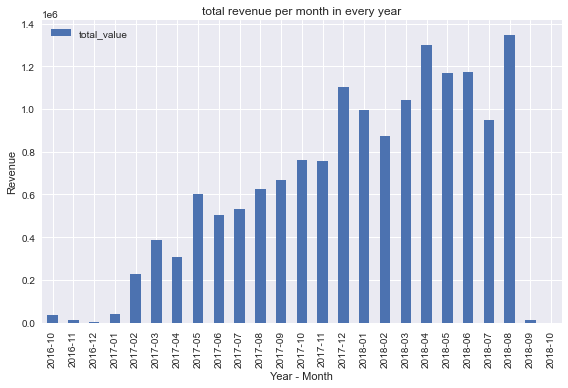

In [41]:
# visualization
plt.style.use('seaborn')
revenue_year_month.plot(x='year_month', y='total_value', kind='bar', title = 'total revenue per month in every year')

#for i, g in enumerate(revenue_year_month['total_value']) :
#    plt.text(i, g, f'{g}', ha='center', fontsize=8)

plt.xlabel('Year - Month')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()

#### Total revenue per year

In [172]:
# or we can see total trend total revenue in every year
revenue['year'] = revenue['order_delivered_customer_date'].dt.year
revenue_year = revenue.groupby(['year'])['total_value'].sum().reset_index()
revenue_year

C:\Users\user\AppData\Local\Temp/ipykernel_18196/2645023029.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenue['year'] = revenue['order_delivered_customer_date'].dt.year


,year,total_value
0,2016.0,46653.74
1,2017.0,6509539.35
2,2018.0,8862201.74


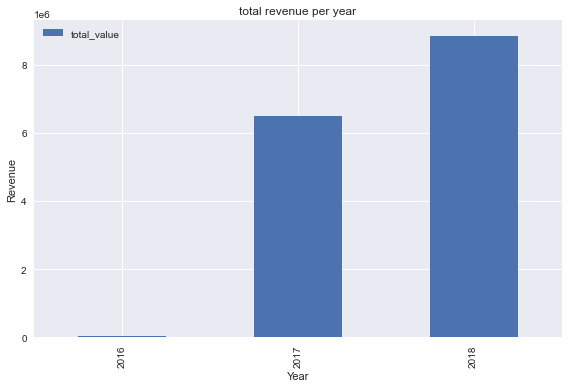

In [50]:
# visualization
plt.style.use('seaborn')
revenue_year.plot(x='year', y='total_value', kind='bar', title = 'total revenue per year')

#for i, g in enumerate(revenue_year['total_value']) :
#    plt.text(i, g, f'{g}', ha='center', fontsize=15)

plt.xlabel('Year')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()

#### Potion of price and freight_value in revenue

In [173]:
# portion of price and freight_value in revenue
revenue['year_month'] = revenue['order_delivered_customer_date'].dt.strftime("%Y-%m")
value_diff1 =revenue.groupby(['year_month'])['price','freight_value'].sum().reset_index().sort_values(by='year_month',ascending=True)
value_diff1

C:\Users\user\AppData\Local\Temp/ipykernel_18196/231357870.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenue['year_month'] = revenue['order_delivered_customer_date'].dt.strftime("%Y-%m")
C:\Users\user\AppData\Local\Temp/ipykernel_18196/231357870.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  value_diff1 =revenue.groupby(['year_month'])['price','freight_value'].sum().reset_index().sort_values(by='year_month',ascending=True)


,year_month,price,freight_value
0,2016-10,29874.44,4436.30
1,2016-11,9837.68,1544.47
2,2016-12,758.86,201.99
3,2017-01,33599.12,5097.90
4,2017-02,198909.29,29168.12
5,2017-03,335886.21,51322.23
6,2017-04,268687.23,38997.05
7,2017-05,520141.45,80497.71
8,2017-06,430779.58,71264.97
9,2017-07,455000.99,76114.59


#### Potion of price and freight value in revenue in year

In [174]:
# in year
revenue['year'] = revenue['order_delivered_customer_date'].dt.strftime("%Y")
value_diff =revenue.groupby(['year'])['price','freight_value'].sum().reset_index()
value_diff

C:\Users\user\AppData\Local\Temp/ipykernel_18196/2983930759.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenue['year'] = revenue['order_delivered_customer_date'].dt.strftime("%Y")
C:\Users\user\AppData\Local\Temp/ipykernel_18196/2983930759.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  value_diff =revenue.groupby(['year'])['price','freight_value'].sum().reset_index()


,year,price,freight_value
0,2016,40470.98,6182.76
1,2017,5612817.85,896721.50
2,2018,7566960.10,1295241.64


#### Top 10 seller with the highest revenue

In [175]:
seller_revenue = revenue.groupby(['seller_id'])['total_value'].sum().reset_index().sort_values(by='total_value',ascending=False)
seller_revenue.head(10)

,seller_id,total_value
834,4869f7a5dfa277a7dca6462dcf3b52b2,247007.06
1480,7c67e1448b00f6e969d365cea6b010ab,237806.69
858,4a3ca9315b744ce9f8e9374361493884,231220.43
982,53243585a1d6dc2643021fd1853d8905,230797.02
2903,fa1c13f2614d7b5c4749cbc52fecda94,200833.50
2543,da8622b14eb17ae2831f4ac5b9dab84a,184706.78
1504,7e93a43ef30c4f03f38b393420bc753a,171973.55
188,1025f0e2d44d7041d6cf58b6550e0bfa,171924.96
1450,7a67c85e85bb2ce8582c35f2203ad736,160278.52
1758,955fee9216a65b617aa5c0531780ce60,156606.48


#### Top 10 customers with the most purchases

In [176]:
# Top 10 customers with the most purchases
customer_revenue = revenue.groupby(['customer_id'])['total_value'].sum().reset_index().sort_values(by='total_value',ascending=False)
customer_revenue.head(10)

,customer_id,total_value
8293,1617b1357756262bfa56ab541c47bc16,13664.08
89276,ec5b2ba62e574342386871631fafd3fc,7274.88
75240,c6e2731c5b391845f6800c97401a43a9,6929.31
92311,f48d464a0baaea338cb25f816991ab1f,6922.21
24068,3fd6777bbce08a352fddd04e4a7cc8f6,6726.66
2007,05455dfa7cd02f13d132aa7a6a9729c6,6081.54
84350,df55c14d1476a9a3467f131269c2477f,4950.34
13870,24bbf5fd2f2e1b359ee7de94defc4a15,4764.34
23252,3d979689f636322c62418b6346b1c6d2,4681.78
10197,1afc82cd60e303ef09b4ef9837c9505c,4513.32


#### Transaction distribution in every order_status

In [177]:
# transaction distribution in every order_status 
df_status = df.groupby(['order_status'])['order_id'].count().reset_index().sort_values(by='order_id',ascending=False)
df_status.columns = ['order_status', 'count_total']
df_status

,order_status,count_total
2,delivered,110197
5,shipped,1185
1,canceled,542
3,invoiced,359
4,processing,357
6,unavailable,7
0,approved,3


## User Demographic

### Data Pre Processing

In [178]:
print(customer.head())
print(customer.info())

                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count

In [179]:
# checking missing value
customer.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

### Analysis

#### User distribution in every state

In [180]:
# customer distribution in every state
customer_state = customer.groupby(['customer_state'])['customer_id'].count().sort_values(ascending=False).reset_index()
customer_state.columns = ['customer_state', 'count_total']
customer_state

,customer_state,count_total
0,SP,41746
1,RJ,12852
2,MG,11635
3,RS,5466
4,PR,5045
5,SC,3637
6,BA,3380
7,DF,2140
8,ES,2033
9,GO,2020


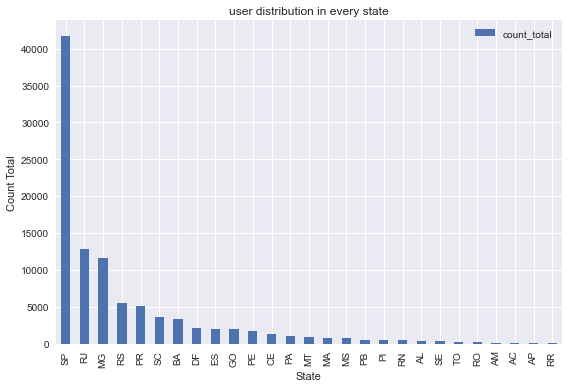

In [181]:
# visualization
plt.style.use('seaborn')
customer_state.plot(x='customer_state', y='count_total', kind='bar', title = 'user distribution in every state')

#for i, g in enumerate(customer_state['customer_id']) :
#    plt.text(i, g, f'{g}', ha='center', fontsize=10)

plt.xlabel('State')
plt.ylabel('Count Total')
plt.tight_layout()
plt.show()

#### Top 10 city with the highest user

In [182]:
# Top 10 city with the highest user
customer_city = customer.groupby(['customer_city'])['customer_id'].count().sort_values(ascending=False).reset_index()
customer_city.columns = ['customer_city', 'count_total']
customer_city.head(10)

,customer_city,count_total
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
5,campinas,1444
6,porto alegre,1379
7,salvador,1245
8,guarulhos,1189
9,sao bernardo do campo,938


## Another Insight

### Top 10 category product with the highest revenue

#### Pre Processing

In [183]:
print(df.shape)
print(product.shape)

(112650, 15)
(32951, 9)


In [184]:
product.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [185]:
print(f'Persentase missing value pada data : {round((610/32951)*100)}%' )

Persentase missing value pada data : 2%


In [186]:
# because of missing value only 2% so we decide to drop them
product = product.dropna()

In [187]:
product.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [188]:
df_1 = pd.merge(df, product, on = 'product_id', how = 'inner')
df_1.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_value,customer_id,order_status,...,order_delivered_customer_date,order_estimated_delivery_date,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
24453,cf1d456a58d288fdbbb0a7f28b0b3aaf,1,5aad359a63cbb4fc35ead44346a3eeb4,d20b021d3efdf267a402c402a48ea64b,2018-01-30 02:35:23,10.99,15.10,26.09,ec47504d187378fcc2ce3e08423c5883,delivered,...,2018-02-07 12:53:21,2018-02-20,moveis_decoracao,24.0,457.0,4.0,100.0,80.0,10.0,60.0
75725,35431beb6e4dc0ce4426a0c9ecac0640,1,39d5577b413907bf3a1d2f9ab9510863,cca3071e3e9bb7d12640c9fbe2301306,2018-01-18 13:28:27,84.26,17.84,102.10,d21146bb7e87bd17fcaccaabea993de7,delivered,...,2018-01-22 20:14:22,2018-02-08,cama_mesa_banho,54.0,229.0,1.0,1500.0,40.0,5.0,30.0
12235,0e5e60b0cddf73f60eb73fac19f590cf,1,c4baedd846ed09b85f78a781b522f126,a1043bafd471dff536d0c462352beb48,2018-02-01 21:39:24,120.00,50.71,170.71,52222a646829d54aa33a64283f3b5549,canceled,...,NaT,2018-02-26,ferramentas_jardim,58.0,1893.0,1.0,5950.0,20.0,20.0,20.0
77099,a01a4f4b4faa17b262af0d0a96668e2c,1,6a0713a63e990052795623e76cc2995e,d2374cbcbb3ca4ab1086534108cc3ab7,2018-01-18 13:48:59,72.90,9.94,82.84,54b1a3f777445eadcd960f085daeda40,delivered,...,2018-01-19 13:10:08,2018-01-29,cama_mesa_banho,31.0,151.0,1.0,900.0,40.0,4.0,30.0
60083,acc957c82b00d1fb5b75a1f27a6d5a5c,1,b1f32fc9713cf8c0813fff7c9c8262b2,8c16d1f32a54d92897cc437244442e1b,2017-11-23 13:15:42,45.60,25.63,71.23,f0475449a5e7db1fdc4148ea907fda6f,delivered,...,2017-11-28 20:44:40,2017-12-11,informatica_acessorios,46.0,644.0,3.0,225.0,30.0,9.0,23.0


In [189]:
print(df_1.shape)

(111046, 23)


#### Analysis

In [190]:
df_1_product = df_1.groupby(['product_category_name'])['total_value'].sum().sort_values(ascending=False).reset_index()
df_1_product.head(10)

,product_category_name,total_value
0,beleza_saude,1441248.07
1,relogios_presentes,1305541.61
2,cama_mesa_banho,1241681.72
3,esporte_lazer,1156656.48
4,informatica_acessorios,1059272.40
5,moveis_decoracao,902511.79
6,utilidades_domesticas,778397.77
7,cool_stuff,719329.95
8,automotivo,685384.32
9,ferramentas_jardim,584219.21


### Most preferred payment type

In [191]:
print(order_payment.head())
print(order_payment.info())

                           order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2 

In [192]:
order_payment.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [193]:
df_2 = pd.merge(order, order_payment, on = 'order_id', how = 'inner')

# create year column
df_2['year'] = df_2['order_delivered_customer_date'].dt.strftime("%Y")

payment_type = df_2.groupby(['payment_type']).size().sort_values(ascending=False).reset_index()
payment_type.columns = ['payment_type','count_total']
payment_type

,payment_type,count_total
0,credit_card,76795
1,boleto,19784
2,voucher,5775
3,debit_card,1529
4,not_defined,3


### Most preferred payment type trend in every year

In [194]:
payment_type_year = df_2.groupby(['year','payment_type']).size().reset_index().sort_values(by='year',ascending=True)
payment_type_year.columns = ['year','payment_type','count_total']
payment_type_year

,year,payment_type,count_total
0,2016,boleto,51
1,2016,credit_card,215
2,2016,debit_card,2
3,2016,voucher,20
4,2017,boleto,8604
5,2017,credit_card,31408
6,2017,debit_card,378
7,2017,voucher,2734
8,2018,boleto,10536
9,2018,credit_card,42962


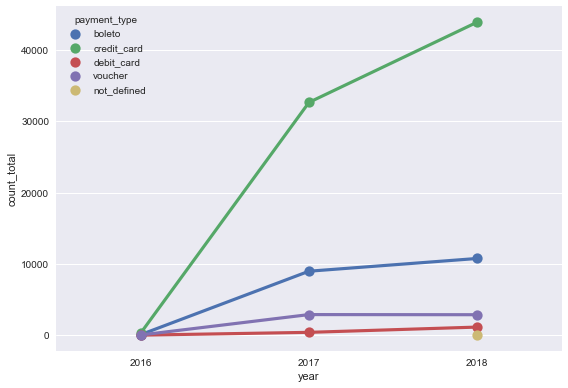

In [155]:
plt.clf()
sns.pointplot(data=payment_type_year, x='year', y='count_total', hue='payment_type')
plt.tight_layout()
plt.show()

## Conclution

#### What we Get ?
Total Revenue and Market Trend

1. Total revenue
2. Total revenue per month in every year
3. Total revenue per year
4. Portion of price and freight_value in revenue
5. Portion of price and freight_value in revenue per year
6. Top 10 seller with the highest revenue
7. Top 10 customers with the most purchases
8. Transaction distribution in every order_status

User Demographic

1. User distribution in every state
2. Top 10 city with the highest user

Another Insight

1. Top 10 category product with the highest revenue
2. Most preferred payment type
3. Most preferred payment tyoe trend in every year